In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import importlib

import sklearn

#normalization
from sklearn import preprocessing

#oe hot encoder
from sklearn.preprocessing import OneHotEncoder

#train/test split
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

#metrics
from sklearn.metrics import accuracy_score

#baseline linear regression
from sklearn import linear_model
#baseline RF
from sklearn.ensemble import RandomForestClassifier

#dnn
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import DNN

#keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import regularizers

%matplotlib inline

Using TensorFlow backend.


In [3]:
df_train = pd.read_csv('train.csv')
print(df_train.shape)
df_train

y = df_train.label.values
print(y.shape)

df_train = df_train.drop(['label'], axis=1)
df_train /= 255
print(df_train.shape)

X = df_train.values

(42000, 785)
(42000,)
(42000, 784)


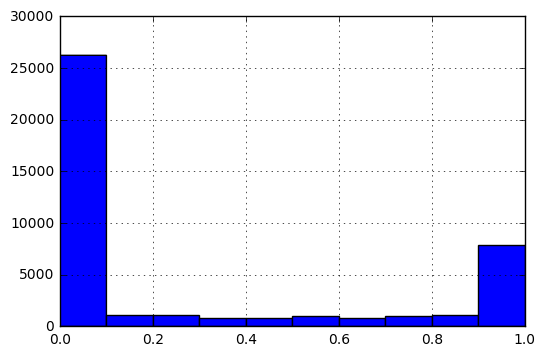

In [14]:
df_train.pixel300.hist()

In [15]:
df_train.pixel300.describe()

count    42000.000000
mean         0.279962
std          0.401214
min          0.000000
25%          0.000000
50%          0.000000
75%          0.647059
max          1.000000
Name: pixel300, dtype: float64

In [4]:
test_size = 0.05

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=test_size, random_state=0)

X_train_k = X_train
X_dev_k = X_dev

enc = OneHotEncoder()
Y_train_k = enc.fit_transform(y_train.reshape(-1, 1)).todense().A
Y_dev_k = enc.transform(y_dev.reshape(-1, 1)).todense().A

X_train_my = X_train_k.T
X_dev_my = X_dev_k.T
Y_train_my = Y_train_k.T
Y_dev_my = Y_dev_k.T

print(X_train.shape)
print(y_train.shape)
print(X_dev.shape)
print(y_dev.shape)

(39900, 784)
(39900,)
(2100, 784)
(2100,)


In [45]:
np.random.seed(0) # set a seed so that the results are consistent

clfs = []
clfs.append(sklearn.linear_model.LogisticRegression())
clfs.append(RandomForestClassifier(n_estimators=100, n_jobs=-1))

for clf in clfs:
    clf.fit(X_train, y_train);
    predictions = clf.predict(X_train)
    accuracy = accuracy_score(predictions, y_train)
    predictions = clf.predict(X_dev)
    accuracy2 = accuracy_score(predictions, y_dev)
    print(type(clf), accuracy, accuracy2)

<class 'sklearn.ensemble.forest.RandomForestClassifier'> 1.0 0.963333333333


In [ ]:
<class 'sklearn.linear_model.logistic.LogisticRegression'> 0.930927318296 0.919523809524
<class 'sklearn.ensemble.forest.RandomForestClassifier'> 1.0 0.963333333333

In [36]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, verbose):
        self.verbose = verbose

    def on_epoch_begin(self, epoch, logs=None):
        pass

    def on_epoch_end(self, epoch, logs=None):
        if self.verbose != None and epoch % self.verbose == 0:
            print(epoch, logs['loss'], logs['acc'], logs['val_acc'])        

In [37]:
np.random.seed(0) # set a seed so that the results are consistent
#initializer = keras.initializers.RandomNormal(stddev=0.01)
initializer = keras.initializers.lecun_normal()
regularizer = None
#regularizer = regularizers.l2(0.01)
model = Sequential()
model.add(Dense(200, input_dim=X_train_k.shape[1], kernel_initializer=initializer, activation='tanh', kernel_regularizer=regularizer))
model.add(Dense(50, kernel_initializer=initializer, activation='tanh', kernel_regularizer=regularizer))
model.add(Dense(10, kernel_initializer=initializer, activation='softmax', kernel_regularizer=regularizer))
optimizer = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [38]:
np.random.seed(0) # set a seed so that the results are consistent
initial_epoch = 0
epochs = 100
#batch_size = int(X_train_k.shape[0])
batch_size = 256
verbose = 0
verbose2 = 10
results = model.fit(X_train_k, Y_train_k, batch_size=batch_size, epochs=epochs, callbacks=[MyCallback(verbose2)], validation_data = (X_dev_k, Y_dev_k), verbose=verbose, initial_epoch=initial_epoch)
Y_predict_k = model.predict(X_train_k)
print('Accuracy train', accuracy_score(Y_train_k.argmax(axis=1), Y_predict_k.argmax(axis=1)))
Y_predict_k = model.predict(X_dev_k)
print('Accuracy dev', accuracy_score(Y_dev_k.argmax(axis=1), Y_predict_k.argmax(axis=1)))

0 0.811203542745 0.811303258181 0.888571428458
10 0.168301124991 0.95107769417 0.945238095352
20 0.101566252525 0.970852130164 0.958571429026
30 0.0684489948484 0.981002506361 0.963809524264
40 0.0474423684449 0.98844611536 0.966666667121
50 0.0335832734686 0.993308270701 0.97047619093
60 0.0243717922534 0.996015037594 0.971428571883
70 0.0177031577885 0.997794486239 0.97047619093
80 0.0132203323951 0.998721804511 0.970952381407
90 0.0100459426822 0.999223057644 0.972857142176
Accuracy train 0.999674185464
Accuracy dev 0.972857142857


In [ ]:
200/50/10 0.1/100/256

Accuracy train 0.999674185464
Accuracy dev 0.972857142857

In [305]:
model.History

AttributeError: 'Sequential' object has no attribute 'History'

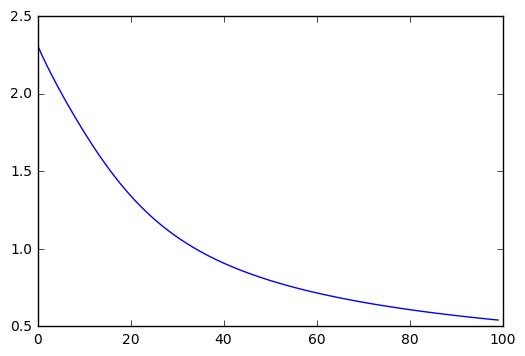

In [299]:
plt.plot(results.history['loss'])
plt.show()

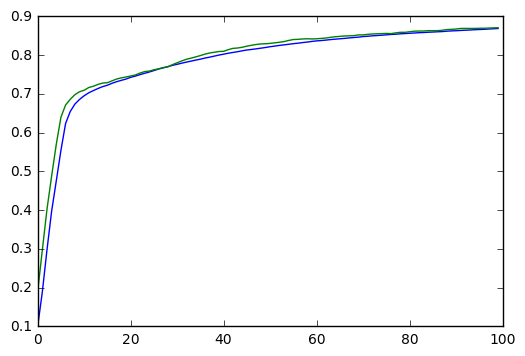

In [300]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.show()

In [6]:
print(X_train_my.shape)
print(Y_train_my.shape)
print(X_dev_my.shape)
print(Y_dev_my.shape)

(784, 39900)
(10, 39900)
(784, 2100)
(10, 2100)


In [27]:
importlib.reload(DNN)

<module 'DNN' from 'C:\\Users\\mircean\\git\\ML\\DeepLearning\\DNN.py'>

In [28]:
#random seed for parameters init
np.random.seed(0) 
dnn = DNN.DNN()
dnn.add_input_layer(X_train_my.shape[0])
dnn.add_layer(200, np.tanh)
dnn.add_layer(50, np.tanh)
dnn.add_layer(10, DNN.softmax)
dnn.costfunction = DNN.categorical_crossentropy
dnn.init = 'Lecun'
#dnn.lambd = 0.01
dnn.compile()

In [29]:
#random seed for mini batch shuffle
np.random.seed(0) 

learning_rate = 0.1
num_iterations = 100
mini_batch_size = 256
verbose = 10
gradient_check=False
num_parameters = 2500

#dnn.compile()

#eval_set = None
eval_set = [(X_train_my, Y_train_my), (X_dev_my, Y_dev_my)]
results = dnn.fit(X_train_my, Y_train_my, eval_set=eval_set, eval_metric='error', learning_rate=learning_rate, num_iterations=num_iterations, mini_batch_size=mini_batch_size, verbose=verbose)

Y_predict_my = dnn.predict(X_train_my)
accuracy = accuracy_score(Y_predict_my.argmax(axis=0), Y_train_my.argmax(axis=0))
print('Accuracy train', accuracy)

Y_predict_my = dnn.predict(X_dev_my)
accuracy = accuracy_score(Y_predict_my.argmax(axis=0), Y_dev_my.argmax(axis=0))
print('Accuracy dev', accuracy)

............................................................................................................................................................
Cost after iteration 0 ['0.742323', '0.892206', '0.894762']
............................................................................................................................................................
Cost after iteration 10 ['0.164730', '0.957068', '0.950000']
............................................................................................................................................................
Cost after iteration 20 ['0.097926', '0.974436', '0.960476']
............................................................................................................................................................
Cost after iteration 30 ['0.064685', '0.983684', '0.963810']
.................................................................................................................................

In [ ]:
10/10, 0.1/100/256
Accuracy train 0.954160401003
Accuracy dev 0.93380952381

200/50/10 0.1/100/256
Accuracy train 0.99969924812
Accuracy dev 0.975714285714

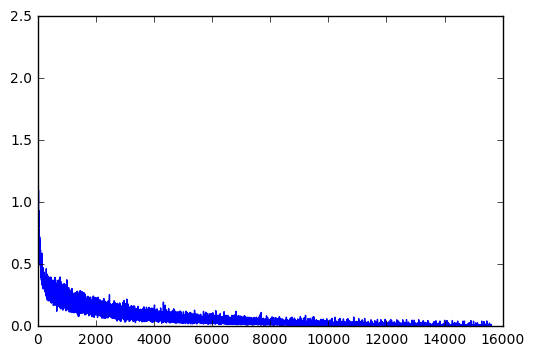

In [30]:
plt.plot(results['loss'])
plt.show()

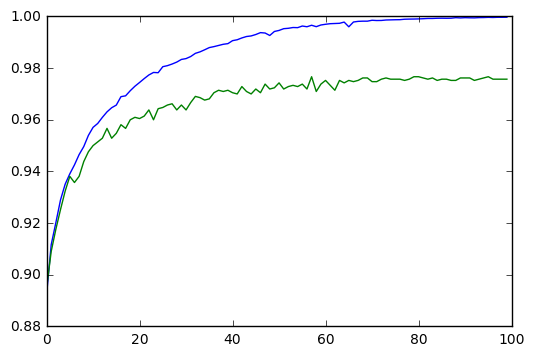

In [31]:
plt.plot(results['eval0'])
plt.plot(results['eval1'])
plt.show()

In [221]:
results = dnn.fit(X_train_my, Y_train_my, eval_set=eval_set, eval_metric='error', learning_rate=learning_rate, num_iterations=num_iterations, print_cost=verbose)


ZeroDivisionError: integer division or modulo by zero

In [340]:
a = np.array([[1,2], [3,4], [5,6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [341]:
b = a.reshape(-1)
b

array([1, 2, 3, 4, 5, 6])

In [385]:
a.shape

(3, 2)

In [387]:
c = b.reshape(a.shape)
c

array([[1, 2],
       [3, 4],
       [5, 6]])

In [388]:
c.shape

(3, 2)

In [389]:
np.arange(4)

array([0, 1, 2, 3])